## This notebook covers EDA, Modeling, Evaluation for
### Capstone Project for Coursera Applied Data Science

In [83]:
import pandas as pd
import numpy as np

Get the data csv in data frame

In [84]:
df = pd.read_csv("Data-Collisions.csv")

c:\users\lokeshpurohit\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [85]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


List columns to understand useful and non-useful columns

In [86]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

Datatype of each column

In [87]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

Dropping few irrelevant fields from begining

In [88]:
df.drop(columns=['X', 'Y', 'OBJECTID','INCKEY', 'COLDETKEY'], inplace=True)

In [89]:
df.columns

Index(['SEVERITYCODE', 'REPORTNO', 'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION',
       'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

SEVERITYCODE field

In [90]:
df['SEVERITYCODE'].value_counts().to_frame()

,SEVERITYCODE
1,136485
2,58188


Found only two types of severity code in database. Seems more property damages then injuries. Other severity codes given in metadata but not present in database.

Lets find with some graphs how much impact is there to severity becasue of situation or environmental conditions

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline

Starting with the "ADDRTYPE vs SEVERITY CODE" 

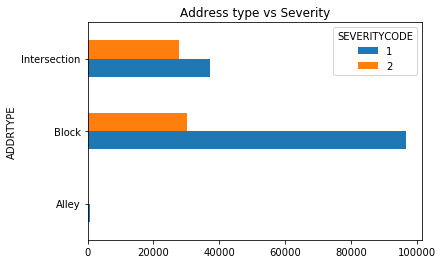

In [92]:
df_sev_add_repno = df[['SEVERITYCODE','ADDRTYPE','REPORTNO']].groupby(by=['SEVERITYCODE','ADDRTYPE']).count().reset_index()
df_grouped = df_sev_add_repno.pivot(index='ADDRTYPE', columns='SEVERITYCODE')['REPORTNO']
df_grouped
df_grouped.plot(kind='barh')
plt.title('Address type vs Severity')
plt.show()

##### Finding: There are certain places that gets more collision (this is obvious)

Now we will check for other relevant fields that we need for our study

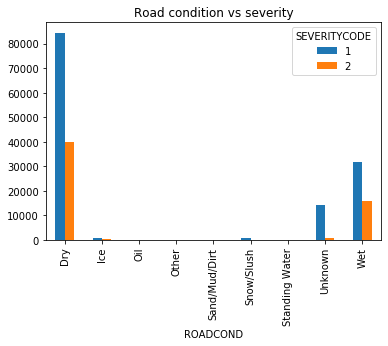

In [93]:
# Road condition
df_sev_road_repno = df[['SEVERITYCODE','ROADCOND','REPORTNO']].groupby(by=['SEVERITYCODE','ROADCOND']).count().reset_index()
df_grouped = df_sev_road_repno.pivot(index='ROADCOND', columns='SEVERITYCODE')['REPORTNO']
df_grouped
df_grouped.plot(kind='bar')
plt.title('Road condition vs severity')
plt.show()

##### Finding: There are many accidents that happened on dry roads. Though Wet roads also caused around 1/3rd of the total

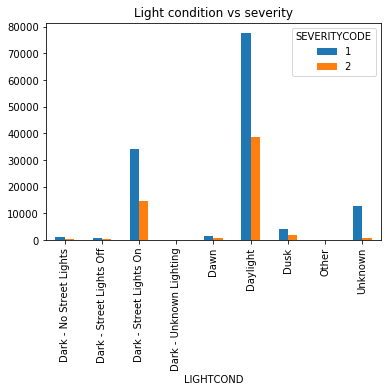

In [94]:
# Light condition
df_sev_light_repno = df[['SEVERITYCODE','LIGHTCOND','REPORTNO']].groupby(by=['SEVERITYCODE','LIGHTCOND']).count().reset_index()
df_grouped = df_sev_light_repno.pivot(index='LIGHTCOND', columns='SEVERITYCODE')['REPORTNO']
df_grouped
df_grouped.plot(kind='bar')
plt.title('Light condition vs severity')
plt.show()

##### Finding: Dark Streets caused some 1/3rd of accidents but many almost double accidents happened in daylight

Let us see some other factors together. There are many of them some are not very clear from metadata also. So better plot their impact and see if they are relevant.

Assuming empty or not available data to be "OTHERS" condition.

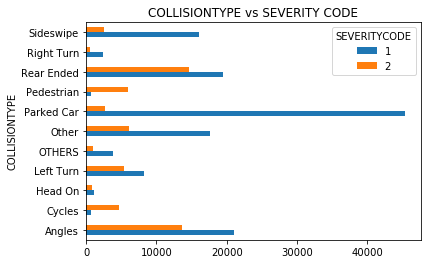

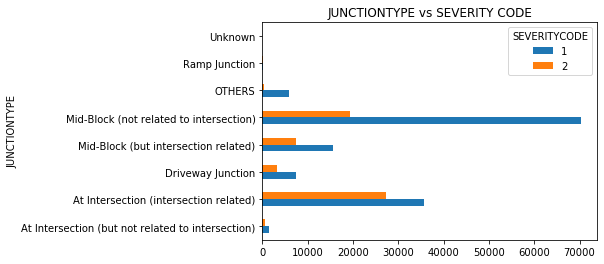

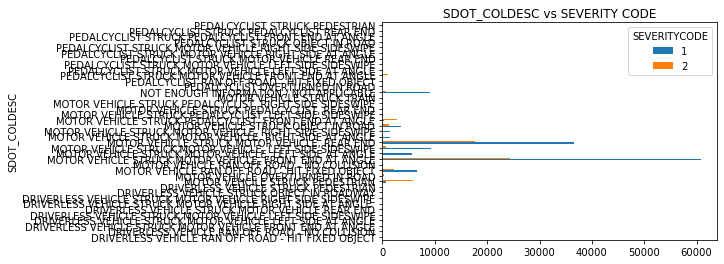

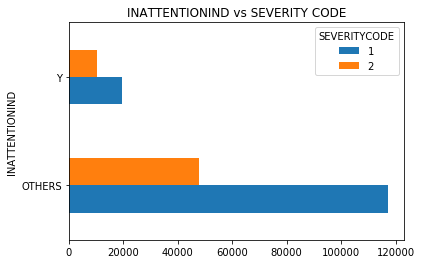

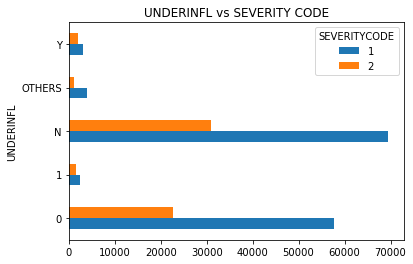

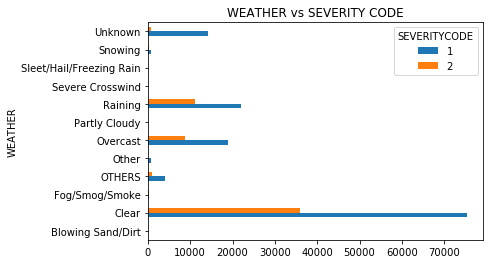

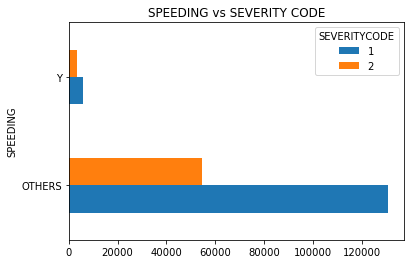

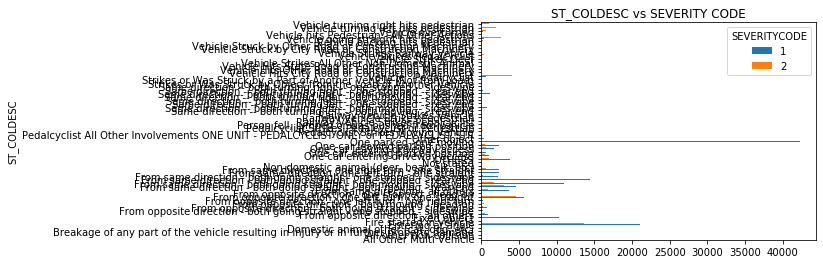

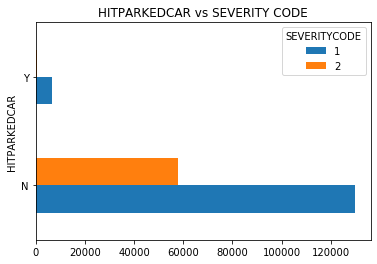

In [95]:
columns = ['COLLISIONTYPE', 'JUNCTIONTYPE', 'SDOT_COLDESC', 'INATTENTIONIND', 
           'UNDERINFL', 'WEATHER', 'SPEEDING', 'ST_COLDESC', 'HITPARKEDCAR']

for col in columns:
    df_temp = df[['SEVERITYCODE',col,'REPORTNO']].fillna('OTHERS')
    df_temp = df_temp.replace('', 'NA')
    df_group = df_temp.groupby(by=['SEVERITYCODE',col]).count().reset_index()
    df_group = df_group.pivot(index=col, columns='SEVERITYCODE')['REPORTNO']
    df_group.plot(kind='barh')
    plt.title(col + ' vs SEVERITY CODE')
    
plt.show()

##### Findings:
##### Almost all categories noted have small or major relation with severity attribute

Create array of columns that will be used for model

In [96]:
rel_columns = ['ADDRTYPE', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'SDOT_COLDESC',
           'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'ST_COLDESC', 'HITPARKEDCAR']

Fill missing values as "Unknown"

In [97]:
df[rel_columns] = df[rel_columns].fillna('Unknown')

In [98]:
df[rel_columns].shape

(194673, 12)

In [99]:
df[rel_columns].head()

,ADDRTYPE,COLLISIONTYPE,JUNCTIONTYPE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ST_COLDESC,HITPARKEDCAR
0,Intersection,Angles,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Unknown,N,Overcast,Wet,Daylight,Unknown,Entering at angle,N
1,Block,Sideswipe,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",Unknown,0,Raining,Wet,Dark - Street Lights On,Unknown,From same direction - both going straight - bo...,N
2,Block,Parked Car,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Unknown,0,Overcast,Dry,Daylight,Unknown,One parked--one moving,N
3,Block,Other,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Unknown,N,Clear,Dry,Daylight,Unknown,From same direction - all others,N
4,Intersection,Angles,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Unknown,0,Raining,Wet,Daylight,Unknown,Entering at angle,N


##### Create Decision tree model

In [100]:
#!pip install sklearn

In [101]:
from sklearn import preprocessing

Convert categorical data into numerical

In [102]:
df['SEVERITYCODE'].values

array([2, 1, 1, ..., 2, 2, 1], dtype=int64)

In [103]:
X = df[rel_columns].values
y = df['SEVERITYCODE'].values

i = 0
for col in rel_columns:
    unique_values = df[col].unique().tolist()
    le = preprocessing.LabelEncoder()
    le.fit(unique_values)
    X[:, i] = le.transform(X[:, i])

    i += 1

X
y

array([2, 1, 1, ..., 2, 2, 1], dtype=int64)

In [104]:
y

array([2, 1, 1, ..., 2, 2, 1], dtype=int64)

In [105]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [108]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion="entropy", max_depth = 20)
tree_dup = DecisionTreeClassifier(criterion="entropy", max_depth = 20)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
print(X_train.shape, X_test.shape)

(136271, 12) (58402, 12)


In [114]:
X_train
y_train
tree.fit(X_train,y_train)
yhat = tree.predict(X_test)

print("F1 score: ", metrics.f1_score(y_test, yhat, labels=[1]))

F1 score:  0.8237429552083838


#### Findings:
##### With Decision tree model we were able to create a model with good precision


## Conclusion:
### With the below variables we can predict the severity with high confidence.
#### "ADDRTYPE', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'ST_COLDESC', 'HITPARKEDCAR'